In [93]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import scipy.signal as signal

In [94]:
def plot_waveform(y, sr, title='Speech Signal'):
    """Plot the waveform of the audio signal."""
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr, color='blue')
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

In [95]:

def plot_spectral_components(y, sr, title):
    """Plot the amplitude part of the spectral components."""
    D = np.fft.fft(y)
    plt.figure(figsize=(14, 5))
    plt.plot(np.abs(D))
    plt.title(title)
    plt.xlabel('Frequency Bin')
    plt.ylabel('Amplitude')
    plt.show()


In [96]:
def compare_time_domain_signals(y, y_inv, title1, title2):
    """Compare the generated time domain signal with the original signal."""
    fig, axs = plt.subplots(2, figsize=(14, 10))

    axs[0].plot(y_inv.real, color='skyblue', linestyle='-', label='Inverse FFT Signal', alpha=0.7)
    axs[1].plot(y, color='lightcoral', linestyle='--', label='Original Audio', alpha=0.7)

    axs[0].set(title=title1, xlabel='Time', ylabel='Amplitude')
    axs[1].set(title=title2, xlabel='Time', ylabel='Amplitude')

    axs[0].legend()
    axs[1].legend()

    plt.tight_layout()
    plt.show()


In [97]:

def plot_word_spectra(y, segments, title):
    """Perform spectral analysis of each word segment."""
    for i, (start, end) in enumerate(segments):
        word = y[start:end]
        D_word = np.fft.fft(word)

        plt.figure(figsize=(14, 5))
        plt.plot(np.abs(D_word))
        plt.title(f'{title} Word {i+1}')
        plt.xlabel('Frequency Bin')
        plt.ylabel('Amplitude')
        plt.show()


In [98]:

def plot_windowed_spectrum(y, sr, frame_length, title):
    """Analyze spectral components using FFT with a rectangular window."""
    win = signal.windows.boxcar(frame_length)
    D_win = np.fft.fft(y[:frame_length] * win)

    plt.figure(figsize=(14, 5))
    plt.plot(np.abs(D_win))
    plt.title(title)
    plt.xlabel('Frequency Bin')
    plt.ylabel('Amplitude')
    plt.show()


In [99]:

def plot_spectrogram(y, sr, title):
    """Plot the spectrogram of the speech signal."""
    frequencies, times, Sxx = signal.spectrogram(y, sr)
    plt.figure(figsize=(14, 5))
    plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()


In [100]:
def plot_spectrogram_fft(y, sr, frame_length):
    """Plot the spectrogram using FFT."""
    # Break the speech signal into window lengths of 20 ms intervals
    frames = librosa.util.frame(y, frame_length=frame_length, hop_length=frame_length)

    # FFT to analyze the spectral components
    D_frames = np.fft.rfft(frames * signal.windows.boxcar(frame_length)[:, np.newaxis], axis=0)

    # Stack these frequency components as columns in a matrix
    D_matrix = np.column_stack(D_frames)

    # Use a heatmap plot to display the matrix
    plt.figure(figsize=(14, 5))
    plt.imshow(20 * np.log10(np.abs(D_matrix)), aspect='auto', origin='lower')
    plt.title('Spectrogram (FFT)')
    plt.xlabel('Time')
    plt.ylabel('Frequency Bin')
    plt.show()

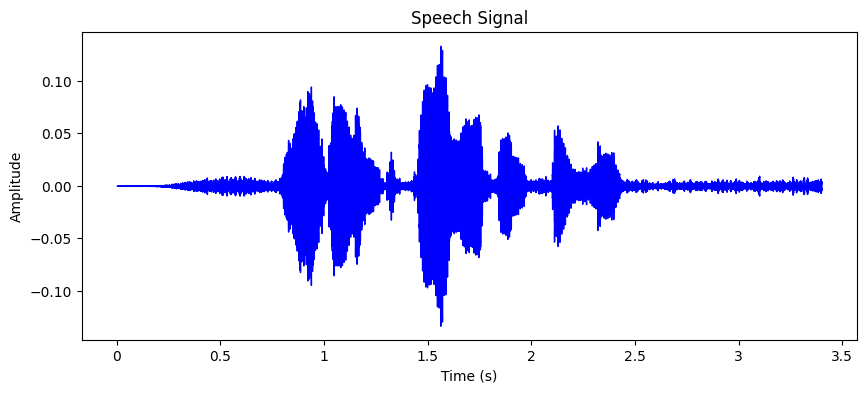

In [101]:

# Load the audio file
y, sr = librosa.load(r'E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-4\Statement.wav')
plot_waveform(y,sr)

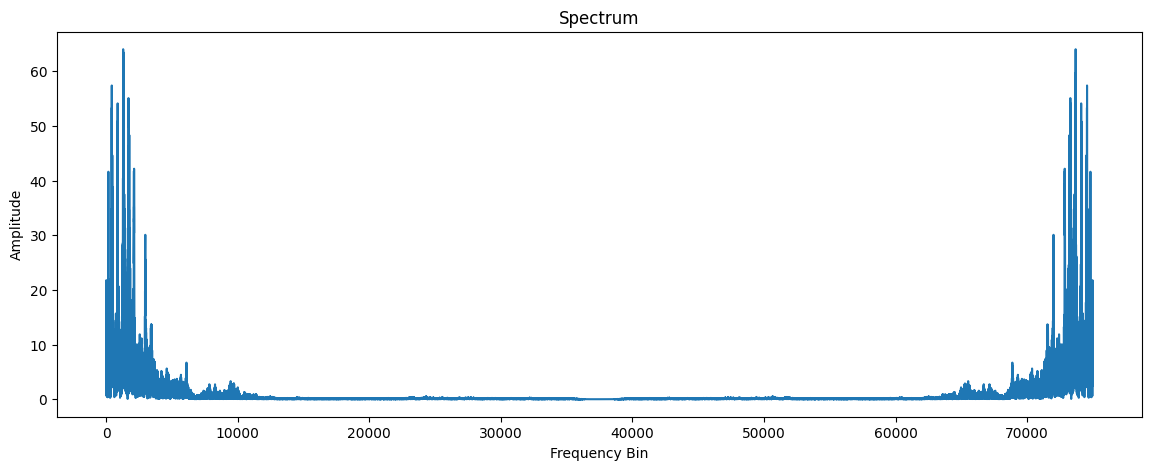

In [102]:

# A1. Spectral analysis in the frequency domain
plot_spectral_components(y, sr, title='Spectrum')


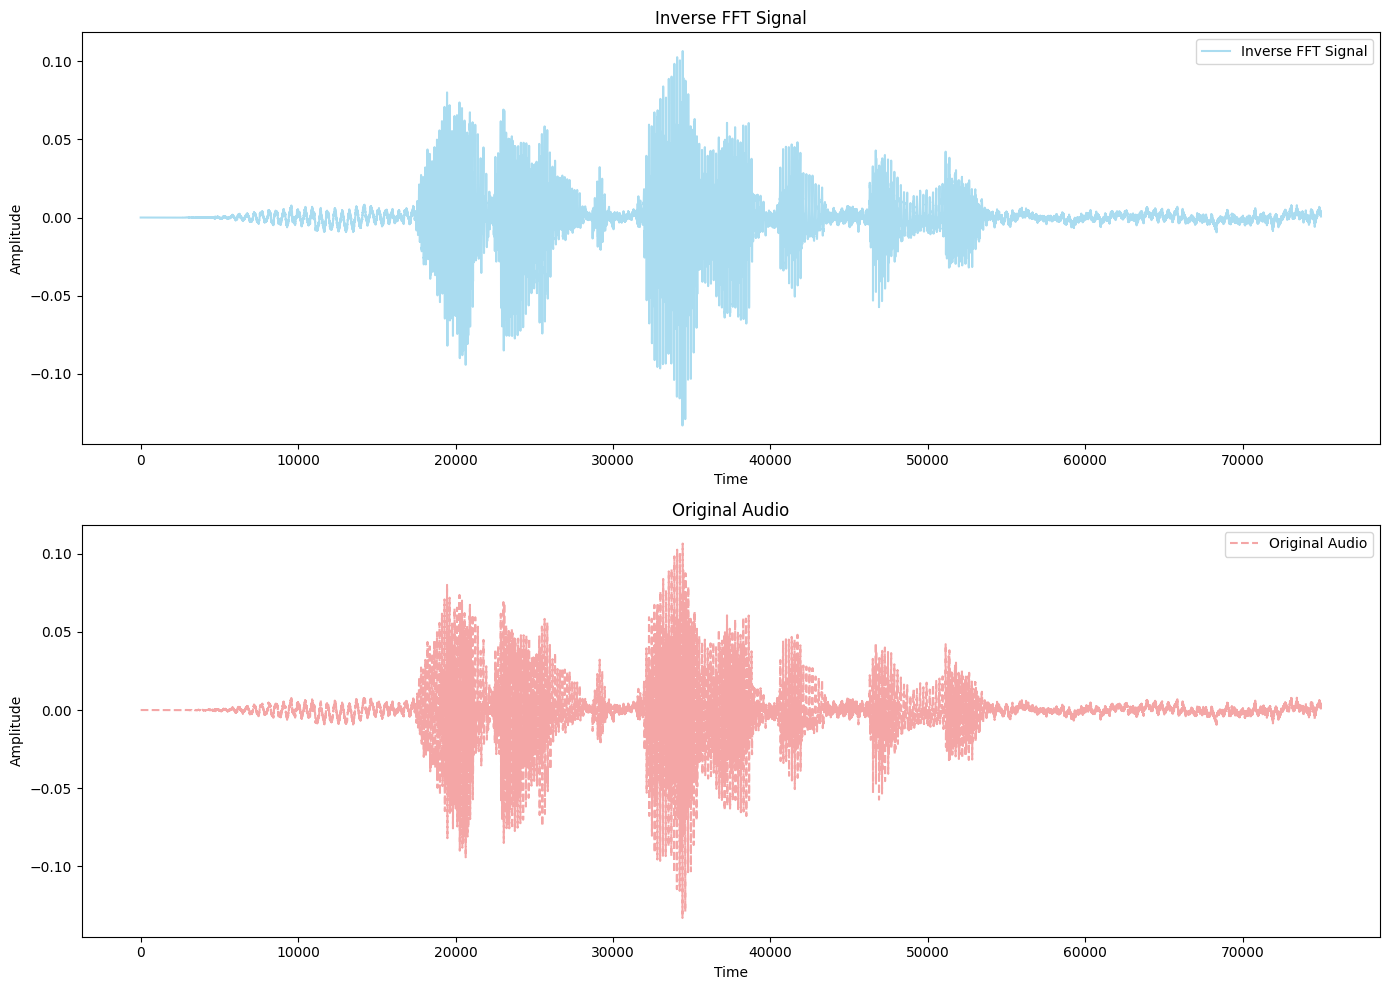

In [103]:

# A2. Inverse FFT to compare time domain signals
D = np.fft.fft(y)
y_inv = np.fft.ifft(D)
compare_time_domain_signals(y, y_inv, title1='Inverse FFT Signal', title2='Original Audio')


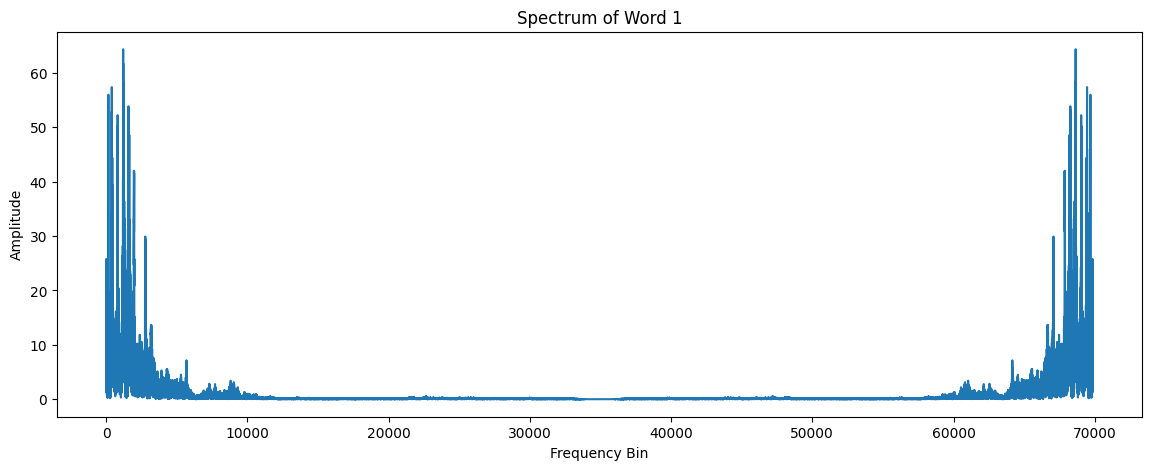

In [104]:

# A3. Spectral analysis of individual words
threshold = np.percentile(np.abs(y), 75)
segments = librosa.effects.split(y, top_db=-20 * np.log10(threshold))
plot_word_spectra(y, segments, title='Spectrum of')


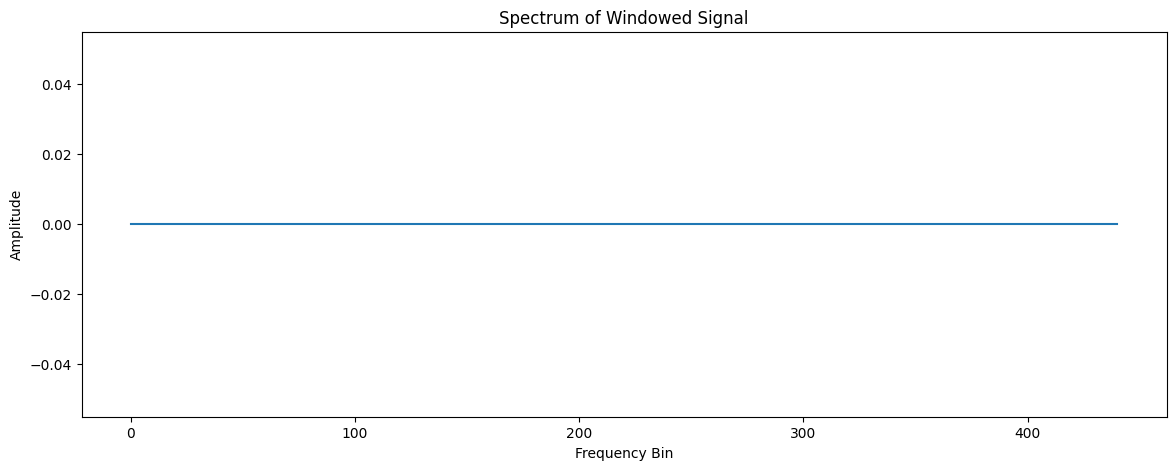

In [105]:

# A4. Spectrum analysis with a rectangular window
frame_length = int(0.02 * sr)
plot_windowed_spectrum(y, sr, frame_length, title='Spectrum of Windowed Signal')


C:\Users\Prahas\AppData\Local\Temp\ipykernel_7584\1337316773.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(20 * np.log10(np.abs(D_matrix)), aspect='auto', origin='lower')


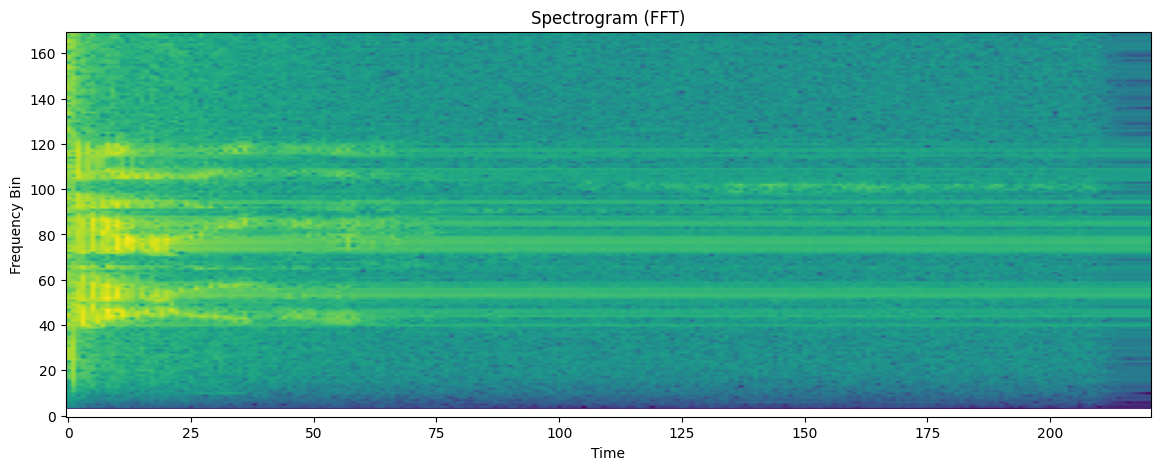

In [106]:

# A5. Spectrogram using numpy.fft.rfft()
plot_spectrogram_fft(y, sr, frame_length)


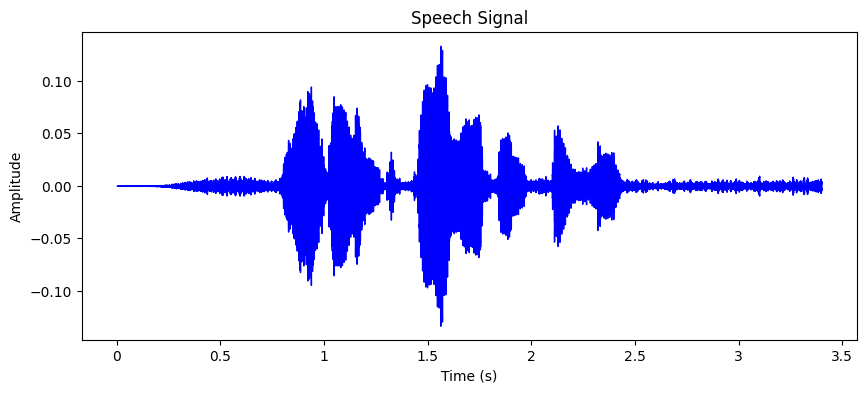

C:\Users\Prahas\AppData\Local\Temp\ipykernel_7584\760840423.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))


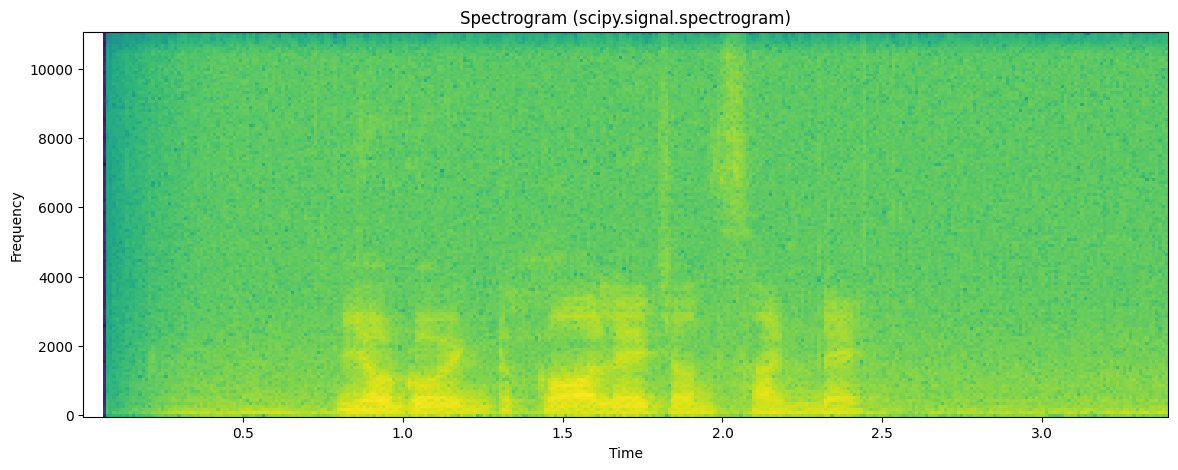

In [107]:
# A6. Spectrogram using scipy.signal.spectrogram()
plot_waveform(y,sr)
plot_spectrogram(y, sr, title='Spectrogram (scipy.signal.spectrogram)')
